<a href="https://colab.research.google.com/github/MariiaBurda/medical_expenses_prediction/blob/main/medical_expenses_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install mglearn

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

# **Medical expenses prediction**

In [26]:
# Import data from local drive
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance (1).csv


In [27]:
import io
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [28]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [30]:
df.describe(include = 'all').round()

,age,sex,bmi,children,smoker,region,charges
count,1338.0,1338,1338.0,1338.0,1338,1338,1338.0
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.0,NaN,31.0,1.0,NaN,NaN,13270.0
std,14.0,NaN,6.0,1.0,NaN,NaN,12110.0
min,18.0,NaN,16.0,0.0,NaN,NaN,1122.0
25%,27.0,NaN,26.0,0.0,NaN,NaN,4740.0
50%,39.0,NaN,30.0,1.0,NaN,NaN,9382.0
75%,51.0,NaN,35.0,2.0,NaN,NaN,16640.0


In [31]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропущених даних в датасеті не виявлено. Дані готові до подальшого аналізу

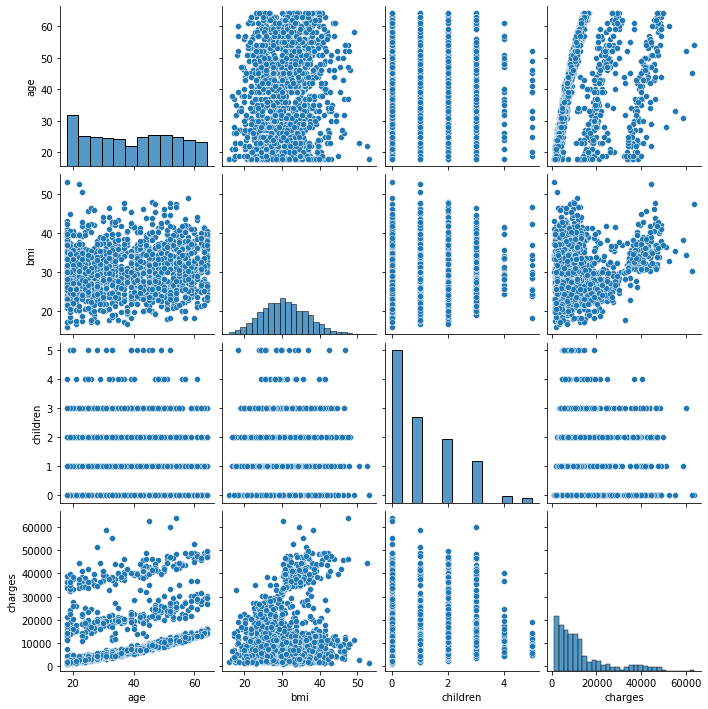

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()

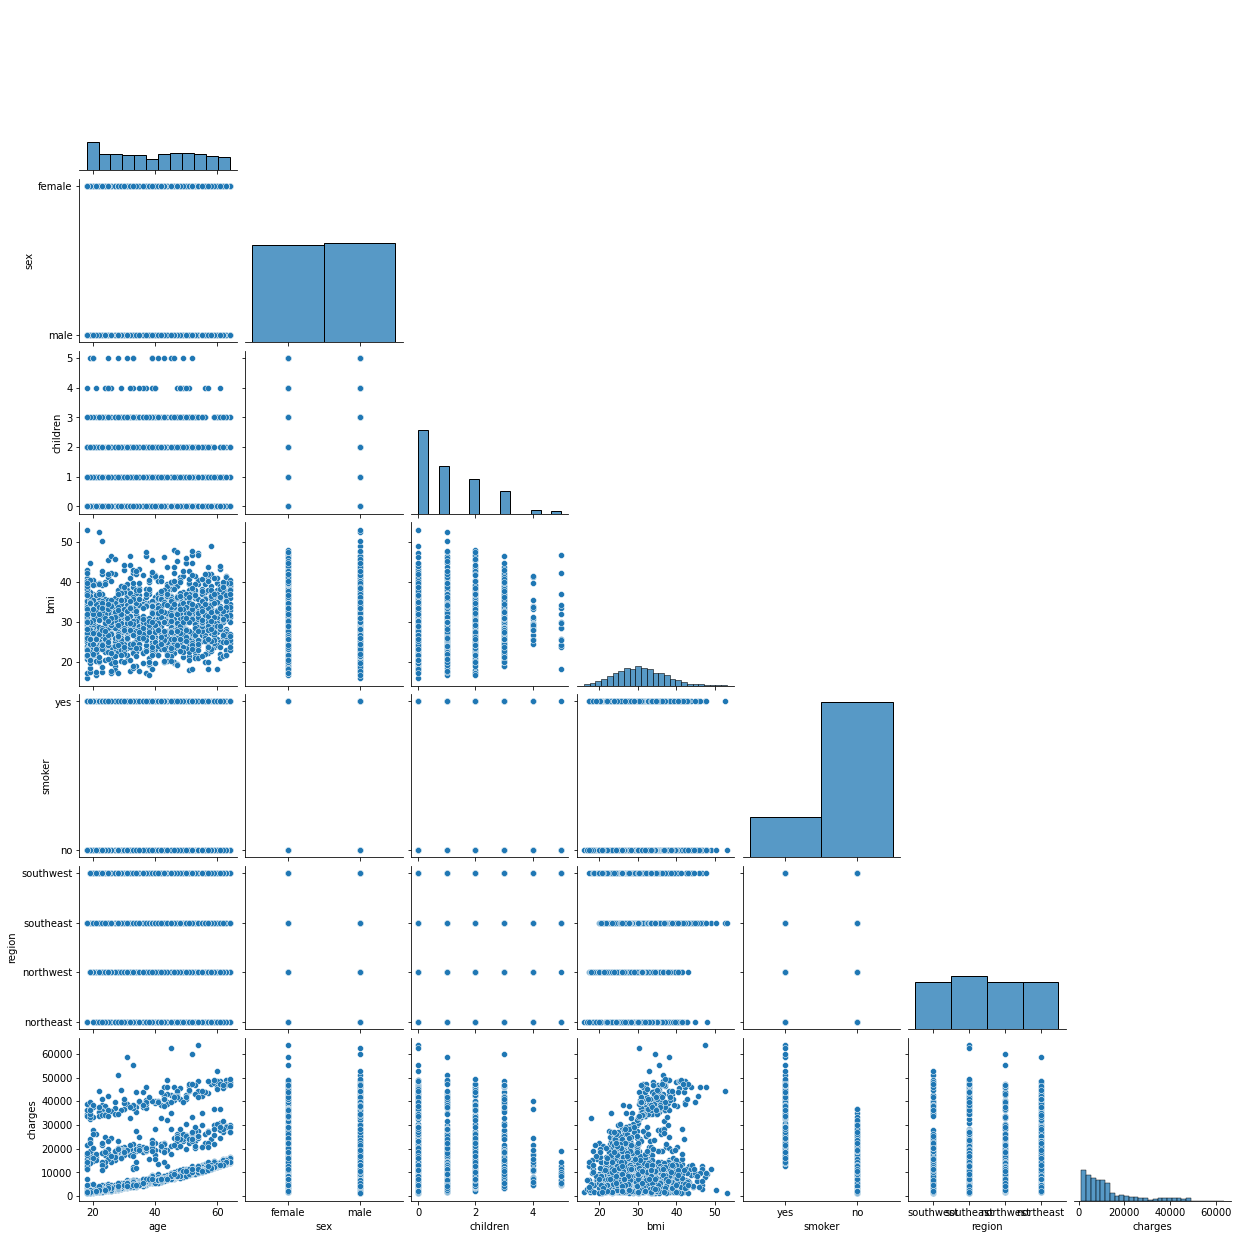

In [33]:
# Select variables for pairplot
sns.pairplot(df, corner  = True, 
    x_vars=["age", "sex", "children", "bmi", "smoker", "region", "charges"],
    y_vars=["age", "sex", "children", "bmi", "smoker", "region", "charges"])

In [34]:
df.sex = df.sex.replace(['female', 'male'], [0,1])
df.smoker = df.smoker.replace(['no', 'yes'], [0,1])
df.region = df.region.replace(['southeast', 'southwest', 'northeast','northwest'],[1,2,3,4])

# df["sex"] = pd.get_dummies(df["sex"])
# df["smoker"] = pd.get_dummies(df["smoker"])
# df["region"] = pd.get_dummies(df["region"])

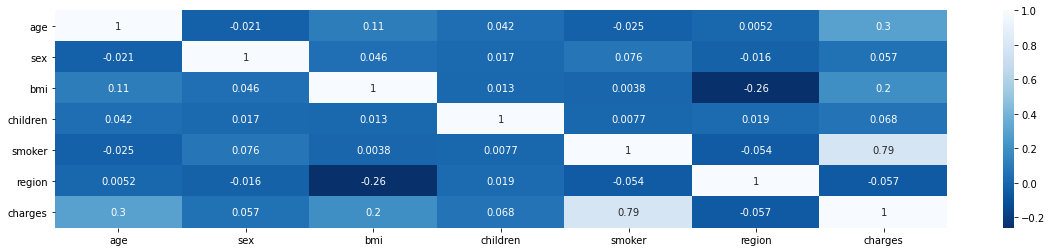

In [35]:
plt.figure(figsize=(20,4))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')

З heatmap ми бачимо, що charges найбільше залежить від таких характеристик (features): age(0.3), bmi(0.2), smoker(0.79), найменше залежить від: sex(0.057), children(0.068) і не залежить від: region(-0.057)


In [36]:
cols = list(df.columns)

X = df[set(cols)-set(["charges"])]
y = df["charges"]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [38]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [39]:
reg = linear_model.LinearRegression()

rid = linear_model.Ridge()
rid_01 = linear_model.Ridge(alpha=0.1)
rid_5 = linear_model.Ridge(alpha=5)
rid_10 = linear_model.Ridge(alpha=10)

lasso = linear_model.Lasso()
lasso_01 = linear_model.Lasso(alpha=0.01, max_iter=100000)
lasso_001 = linear_model.Lasso(alpha=0.001, max_iter=100000)
lasso_0001 = linear_model.Lasso(alpha=0.0001, max_iter=100000)

elas = linear_model.ElasticNet()

models = [reg, rid, rid_01, rid_5, rid_10, lasso, lasso_01, lasso_001, lasso_0001, elas]

In [40]:
for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Правильність на навчальному наборі: {: .4f}".format(model.score(X_train, y_train)))
    print("Правильність на тестовому наборі: {: .4f}".format(model.score(X_test, y_test)))
    print("r2 score  на навчальному наборі: {: .4f}".format(r2_score(y_true=y_train, y_pred=y_train_pred)))
    print("r2 score на тестовому наборі: {: .4f}".format(r2_score(y_true=y_test, y_pred=y_test_pred)))
    print("Кількість використаних фіч: {}\n".format(np.sum(model.coef_ != 0)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Правильність на навчальному наборі:  0.7304
Правильність на тестовому наборі:  0.7908
r2 score  на навчальному наборі:  0.7304
r2 score на тестовому наборі:  0.7908
Кількість використаних фіч: 6

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Правильність на навчальному наборі:  0.7304
Правильність на тестовому наборі:  0.7903
r2 score  на навчальному наборі:  0.7304
r2 score на тестовому наборі:  0.7903
Кількість використаних фіч: 6

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Правильність на навчальному наборі:  0.7304
Правильність на тестовому наборі:  0.7907
r2 score  на навчальному наборі:  0.7304
r2 score на тестовому наборі:  0.7907
Кількість використаних фіч: 6

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, nor

Застосувавши лінійну, гребну і лассо регресію, а також ElasticNet, ми бачимо, що найбільшу правильність на тестовому наборі даних дала гребнева регресія з показником alpha=10. Score = 0.7505

**Поліноміальна регресія**

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
def EvaluateRegression(Test_data,Predict_data):
    MSE = np.round(metrics.mean_squared_error(Test_data, Predict_data),3)
    RMSE = np.round(np.sqrt(metrics.mean_squared_error(Test_data, Predict_data)),3)
    print('Mean square error :', MSE)
    print('RMSE :', RMSE)
    return MSE, RMSE

poly = PolynomialFeatures(degree=2)
linear_poly = LinearRegression()
X_train_rdy = poly.fit_transform(X_train)
linear_poly.fit(X_train_rdy,y_train)
X_test_rdy = poly.fit_transform(X_test)

Input_model= linear_poly
print('Regression: For train')
MSE, RMSE = EvaluateRegression(y_train, Input_model.predict(X_train_rdy))
#For testing data
print('Regression: For test')
MSE, RMSE = EvaluateRegression(y_test,  Input_model.predict(X_test_rdy))


Regression: For train
Mean square error : 24467270.128
RMSE : 4946.44
Regression: For test
Mean square error : 19884131.679
RMSE : 4459.163


In [43]:
 from sklearn.preprocessing import PolynomialFeatures
 from sklearn.linear_model import LinearRegression
 from sklearn.pipeline import Pipeline
 import numpy as np
 model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])
 model = model.fit(X_train, y_train)
 MSE, RMSE = EvaluateRegression(y_test,  model.predict(X_test))

Mean square error : 19753772.41
RMSE : 4444.522


In [44]:
model.score(X_test, y_test)

0.8761281829348557

Застосувавши поліноміальну регресію, ми отримали найбільшу правильність на тестовому наборі даних. Score = 0.84. Отже, для нашої задачі поліноміальна регресія найефективніша.